# CiclopeIA 👁️

## Object recognition model

Este proyecto es una réplica modificada de [CiclopeIA](https://medium.com/saturdays-ai/ciclopeia-imaginando-tu-entorno-14dd3781a7ac), llevado a cabo por Alexander Cortes, Ariosto Olmedo Cabrera, Antonio Paucar, Carlos Sesma, Miriam Quimi, Santiago Yunes y Viviana Márquez, en el contexto de [Saturdays AI](https://community.saturdays.ai/home). Tiene por objetivo ayudar a las personas invidentes ante el reconocimiento de billetes. En mi caso, el proyecto tiene varias diferencias con respecto al original:

- Reconoce billetes de Euro, en lugar de dólares.

- La aplicación final se alojará en la nube, en lugar de en local.

Para cumplir con esto, he creado un dataset obtenido a partir de imágenes en Google, gracias a la herramienta de scraping Selenium y al tutorial [Image Scraper And Downloader](https://github.com/techwithtim/Image-Scraper-And-Downloader). El código customizado se puede ver en el archivo `scrap.py'. Concretamente he obtenido unas 10 imágenes de cada uno de los 7 valores de billetes de Euro, de forma que han resultado unas 70 en total. A continuación, he utilizado la aplicación en línea [roboflow](https://app.roboflow.com/), que permite etiquetar objetos en las imágenes. Una vez hecho esto, el mismo software ha dividido la muestra en train, valid y test, ha escalado las imágenes para que tengan el mismo tamaño, y ha aumentado el número de muestras de entrenamiento modificando las originales. El resultado final se puede ver, modificar y descargar en [este enlace](https://app.roboflow.com/saturdays/euro-bill/7).

Una vez descargado el dataset etiquetado y en formato Yolo, lo que queda es hacer finetuning de un modelo pre-entrenado. Aquí muestro los pasos:

In [ ]:
# clone and install yolov5

!git clone https://github.com/ultralytics/yolov5.git
%cp -r ./dataset/ yolov5/dataset/ # copy dataset into yolov5
%cd ./yolov5/
%pip install -r requirements.txt

In [ ]:
# import core and utilities libraries
import os
import gc
           
# import ai and training metric libraries
import torch
from yolov5 import utils

# validate CUDA is enabled
display = utils.notebook_init()


En este momento ya están las librerías listas. Quedaría copiar la carpeta del dataset dentro del proyecto antes de continuar. Hay que modificar el fichero `data.yaml' para que los directorios coincidan con los de nuestro proyecto. Una vez hecho esto, ya podemos entrenar nuestro modelo:

In [ ]:
!wandb disabled # Si quieres puedes configurar wandb para acceder a las métricas
!python train.py --batch 12 --epochs 50 --data dataset/data.yaml

Una vez que está entrenado, podemos acceder al modelo en la dirección "yolov5/runs/train/exp/weights/best.pt". Para cargarlo, utilizamos el siguiente código:

In [3]:
#path = 'runs/train/exp/weights/best.pt'
path = "best.pt"
model = torch.hub.load('ultralytics/yolov5', 'custom', path=path, _verbose=False)

Using cache found in /home/jsr/.cache/torch/hub/ultralytics_yolov5_master


Y para verificarlo:

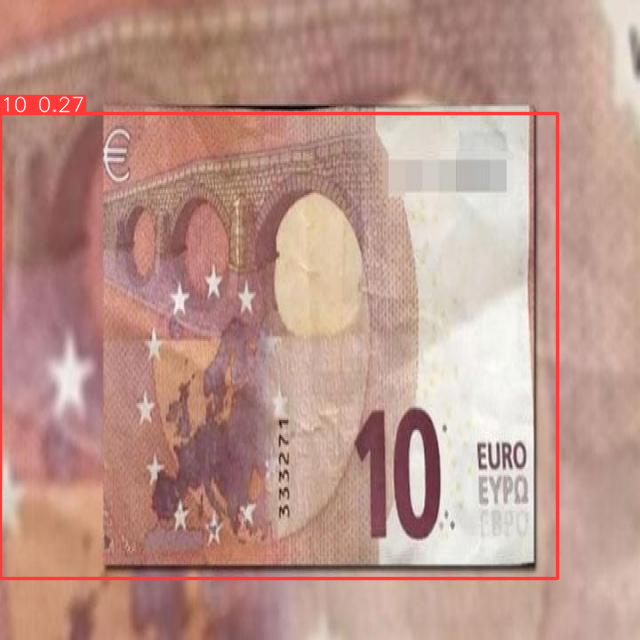

In [4]:
model("dataset/test/images/10-22_jpg.rf.9c4b992e8d2cdb83f7575e8ba720f210.jpg").show()

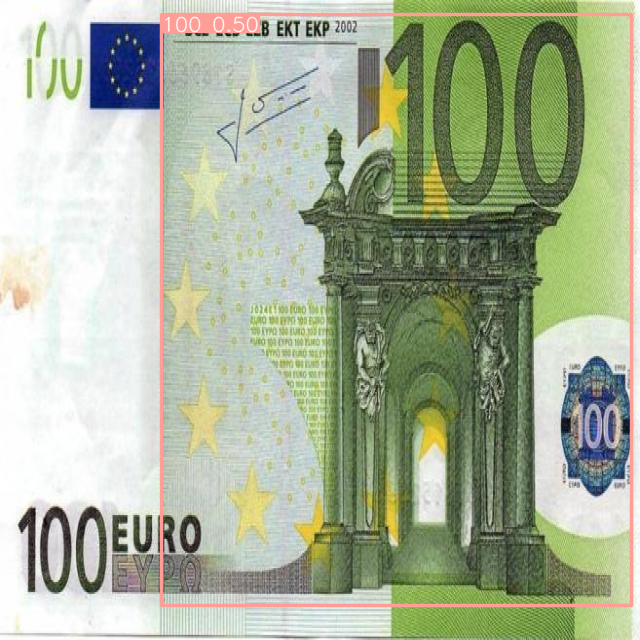

In [5]:
model("dataset/test/images/100-15_jpg.rf.6b1787a83b58f295c06c5f44bd138d37.jpg").show()

El modelo lo utilicé para crear una aplicación en Huggingface llamada [CiclopeIA](https://huggingface.co/spaces/Saturdays/CiclopeIA), para cumplir con el segundo objetivo mencionado al principo. Esta aplicación detecta, a través de la cámara del móvil o la webcam del ordenador, billetes y los clasifica según su valor.